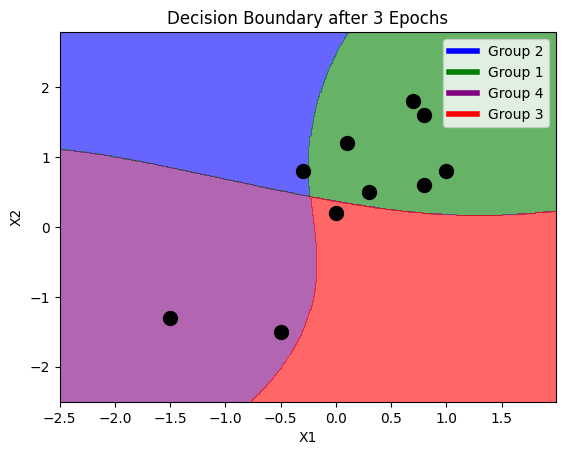

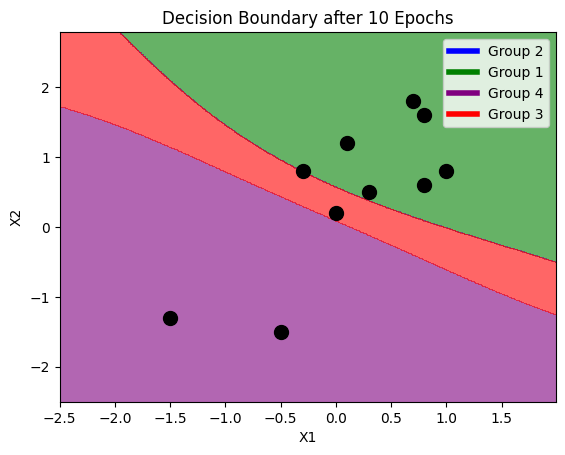

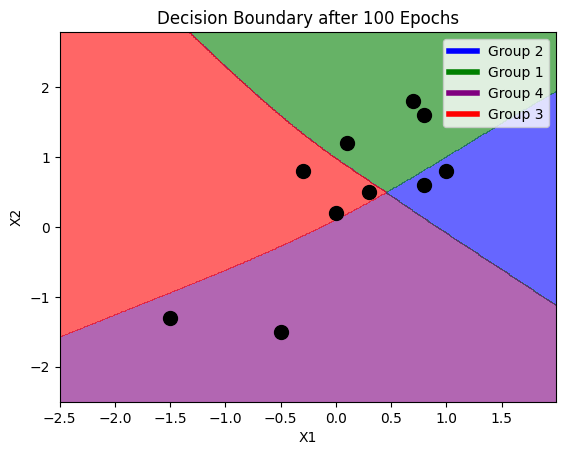

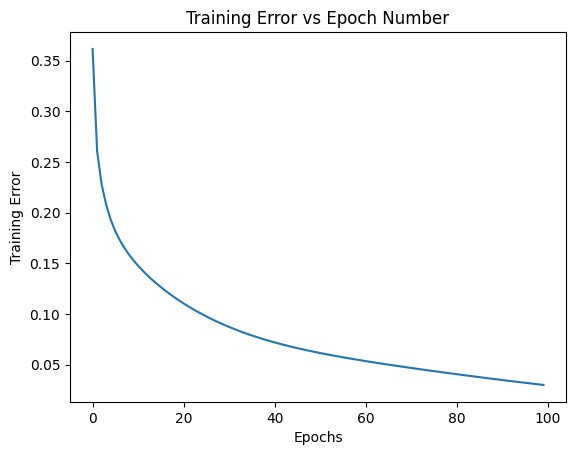

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of sigmoid
def sigmoid_derivative(z):
    return z * (1 - z)

# Mean squared error
def mse_loss(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

# Plot decision boundary with a legend
def plot_decision_boundary(W1, b1, W2, b2, X, epoch):
    # Create a grid of points
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Flatten the grid to feed it into the network
    grid = np.c_[xx.ravel(), yy.ravel()].T
    
    # Forward pass on the grid to predict class labels
    Z1 = np.dot(W1, grid) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    # Get the predicted class (0, 1, 2, or 3) for each point in the grid
    predictions = np.round(A2[0, :]) + 2 * np.round(A2[1, :])  # Combining binary outputs into 4 classes
    predictions = predictions.reshape(xx.shape)
    
    # Define colors for the groups
    group_colors = {0: 'blue', 1: 'green', 3: 'purple', 2: 'red'}
    group_labels = {0: "Group 2", 1: "Group 1", 2: "Group 4", 3: "Group 3"}
    
    # Plot the decision boundary
    plt.contourf(xx, yy, predictions, alpha=0.6, levels=[-0.5, 0.5, 1.5, 2.5, 3.5], colors=[group_colors[i] for i in group_colors])
    
    # Plot the data points (as black dots)
    plt.scatter(X[0, :], X[1, :], c='black', edgecolors='k', s=100, label="Data Points")
    
    # Add a legend for the groups
    #ordered_groups = [0, 1, 2, 3]  # Order: Group 1, Group 2, Group 3, Group 4
    handles = [plt.Line2D([0], [0], color=color, lw=4, label=label)
               for color, label in zip(group_colors.values(), group_labels.values())]
    plt.legend(handles=handles, loc="upper right")
    
    # Plot titles and labels
    plt.title(f"Decision Boundary after {epoch + 1} Epochs")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

# Define input (X) and target output (Y) based on the corrected table
X = np.array([[ 0.1,  0.7,  0.8,  0.8,  1.0,  0.3,  0.0, -0.3, -0.5, -1.5],
              [ 1.2,  1.8,  1.6,  0.6,  0.8,  0.5,  0.2,  0.8, -1.5, -1.3]])

Y = np.array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0],  # Binary labels for Group 1 and Group 3
              [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]]) # Binary labels for Group 2 and Group 4

# Network architecture
n_inputs = 2
n_hidden = 10
n_outputs = 2
learning_rate = 0.1
epochs = 100

# Initialize weights and biases
W1 = np.random.randn(n_hidden, n_inputs)
b1 = np.zeros((n_hidden, 1))
W2 = np.random.randn(n_outputs, n_hidden)
b2 = np.zeros((n_outputs, 1))

# Store loss history
loss_history = []

# Training loop
for epoch in range(epochs):
    # Forward propagation
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    # Compute loss
    loss = mse_loss(Y, A2)
    loss_history.append(loss)
    
    # Backpropagation
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(dZ1, X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    
    # Update weights and biases
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    
    # Plot decision boundary at specific epochs
    if epoch in [2, 9, 99]:
        plot_decision_boundary(W1, b1, W2, b2, X, epoch)

# Plot training error vs epoch
plt.plot(range(epochs), loss_history)
plt.xlabel("Epochs")
plt.ylabel("Training Error")
plt.title("Training Error vs Epoch Number")
plt.show()
